# Лабораторная работа № 3
## Визуализация данных

### Цель работы

Изучение программных средств для визуализации наборов данных.

### Задачи 

 - изучение основных типов графиков библиотеки matplotlib;
 - изучение основных типов графиков библиотеки seaborn;
 - получение навыков анализа данных по визуальным представлениям данных.
    

![](./img/citrus.jpg)

Reddit - это сокровищница подлинного жизненного опыта миллионов людей. Такие подресурсы, как r/lifeProTips и r/YouShouldKnow, известны тем, что содержат самые лучшие и практичные советы, которые каждый может применить в своей жизни.

In [49]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import random

import matplotlib.pyplot as plt
import re

- Id - идентификатор сообщения, присвоенный reddit. (type:str)

- Author - Создатель сообщения. (type:str)

- isOver18 - Является ли пост NSFW или нет. (type:bool)

- postUrl - URL-адрес фактического сообщения на Reddit. (type:str)

- subreddit - Название подраздела, на котором был создан пост. (type:str)

- postTitle - Название поста. (type:str)

- hasPostBody - Имеет ли пост тело поста или нет. (type:bool)

- postBody - Тело поста. Если null, то пост не содержит тела. (type:str)

- score - Оценка поста пользователями. (type:int)

- numComments - Количество комментариев в исходном посте на reddit. (type:int)

In [11]:
data = pd.read_csv('./datasets/Reddit/helpfulRedditPosts.csv')
data.head()

,id,author,isOver18,postUrl,subreddit,postTitle,hasPostBody,postBody,score,numComments
0,f6jt5e,w2555,False,https://reddit.com/r/LifeProTips/comments/f6jt5e/,LifeProTips,"LPT: keep your mouth shut, and don't volunteer...",True,I had a phone interview scheduled this morning...,147296,4730
1,lq1jn7,this1tyme,False,https://reddit.com/r/LifeProTips/comments/lq1jn7/,LifeProTips,"LPT: Texans, you are about to experience the w...",False,NaN,134320,4121
2,j2mm1b,raviji22,False,https://reddit.com/r/LifeProTips/comments/j2mm1b/,LifeProTips,"LPT: When you sign up for anything online, put...",False,NaN,129513,1971
3,fqkkke,[deleted],False,https://reddit.com/r/LifeProTips/comments/fqkkke/,LifeProTips,"LPT: First rule of family gatherings, always b...",True,[deleted],124219,2762
4,gmmiah,AlphaSyncz,False,https://reddit.com/r/YouShouldKnow/comments/gm...,YouShouldKnow,"YSK That there is a Youtuber called ""Dad, how ...",True,It's just basic stuff but I know friends of mi...,120038,1532


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13079 entries, 0 to 13078
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           13079 non-null  object
 1   author       13079 non-null  object
 2   isOver18     13079 non-null  bool  
 3   postUrl      13079 non-null  object
 4   subreddit    13079 non-null  object
 5   postTitle    13079 non-null  object
 6   hasPostBody  13079 non-null  bool  
 7   postBody     9384 non-null   object
 8   score        13079 non-null  int64 
 9   numComments  13079 non-null  int64 
dtypes: bool(2), int64(2), object(6)
memory usage: 843.1+ KB


In [13]:
data.columns

Index(['id', 'author', 'isOver18', 'postUrl', 'subreddit', 'postTitle',
       'hasPostBody', 'postBody', 'score', 'numComments'],
      dtype='object')

In [20]:
data['postUrl'].tolist()[:5:]

['https://reddit.com/r/LifeProTips/comments/f6jt5e/',
 'https://reddit.com/r/LifeProTips/comments/lq1jn7/',
 'https://reddit.com/r/LifeProTips/comments/j2mm1b/',
 'https://reddit.com/r/LifeProTips/comments/fqkkke/',
 'https://reddit.com/r/YouShouldKnow/comments/gmmiah/']

In [23]:
data['postBody'].tolist()[:2:]

["I had a phone interview scheduled this morning, but accidentally slept through it. When I got up and saw that I missed it, I had the desperate urge to call and offer up excuses, in the hope that maybe, just maybe, they'd be understanding and give me another chance. \n\nInstead, all I did was apologize and ask if we could reschedule. That's it, one sentence, no additional information, no explanation or excuse as to why I missed the first interview. \n\nThey replied within 20 minutes, apologizing to ME, saying it was probably their fault, that they'd been having trouble with their computer system for days, and of course I could reschedule, was I available that afternoon?\n\nDon't ever volunteer information, kids. You never know what information the other party has, and you can always give information if asked for it later.\n\n\nEdit: what the shit. 107k upvotes and top post of all time on LPT, all because I overslept",
 nan]

In [22]:
data['score'].tolist()[:5:]

[147296, 134320, 129513, 124219, 120038]

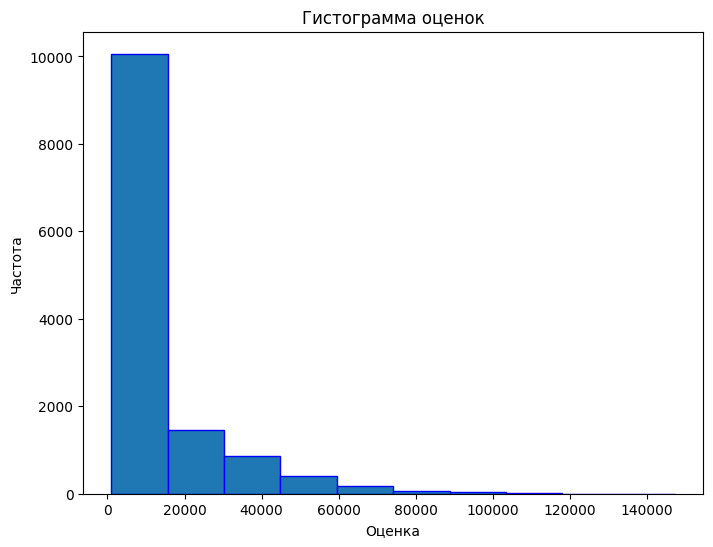

In [90]:
plt.figure(figsize=(8, 6))
plt.hist(data['score'], bins=10, edgecolor='b')
plt.title('Гистограмма оценок')
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.show()

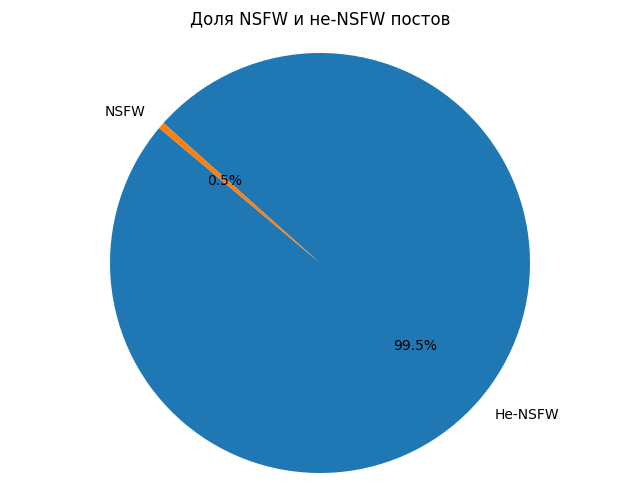

In [32]:
nsfw_counts = data['isOver18'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(nsfw_counts, labels=['Не-NSFW', 'NSFW'], autopct='%1.1f%%', startangle=140)
plt.title('Доля NSFW и не-NSFW постов')
plt.axis('equal')
plt.show()

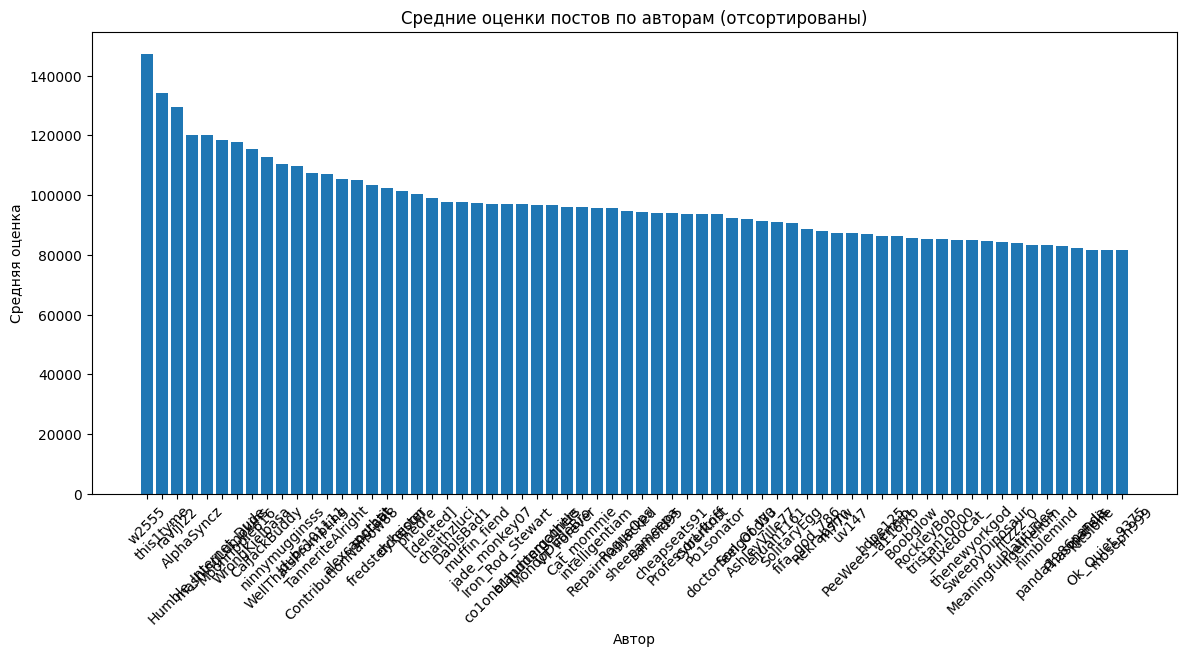

In [111]:
data1 = data.iloc[:70:,:]
author_scores = data1.groupby('author')['score'].mean().reset_index()
author_scores = author_scores.sort_values(by='score', ascending=False)
plt.figure(figsize=(14, 6))
plt.bar(author_scores['author'], author_scores['score'])
plt.title('Средние оценки постов по авторам (отсортированы)')
plt.xlabel('Автор')
plt.ylabel('Средняя оценка')
plt.xticks(rotation=45)
plt.show()

Text(0, 0.5, 'Количество комментариев')

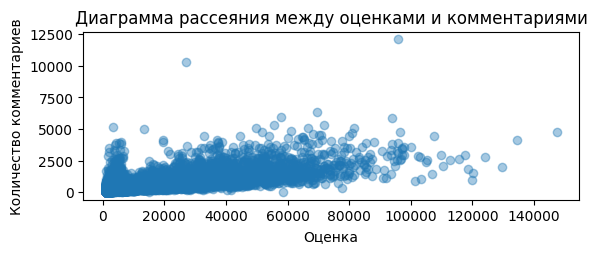

In [101]:
# Диаграмма рассеяния между оценками и количеством комментариев
plt.subplot(2, 1, 2)
plt.scatter(data['score'], data['numComments'], alpha=0.4)
plt.title('Диаграмма рассеяния между оценками и комментариями')
plt.xlabel('Оценка')
plt.ylabel('Количество комментариев')

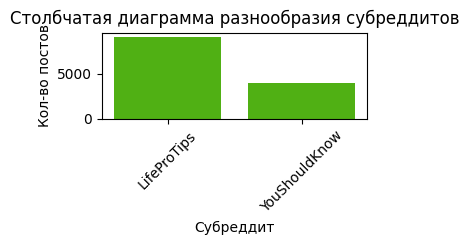

In [112]:
subreddit_colors = {subreddit: f'#{random.randint(0, 0xFFFFFF):06x}' for subreddit in data['subreddit'].unique()}
data['subreddit_color'] = data['subreddit'].map(subreddit_colors)
subreddit_counts = data['subreddit'].value_counts()
plt.subplot(3, 2, 6)
plt.bar(subreddit_counts.index, subreddit_counts.values, color=data['subreddit_color'])
plt.title('Столбчатая диаграмма разнообразия субреддитов')
plt.xlabel('Субреддит')
plt.ylabel('Кол-во постов')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

#### Контрольные вопросы

1. Функции Python, используемые для визуализации данных:

   - matplotlib (для создания графиков)
   - seaborn (для улучшения визуального стиля графиков)
   - plotly (для интерактивных графиков)
   - bokeh (для создания интерактивных и веб-ориентированных графиков)
   - pandas.plot (встроенные функции визуализации в библиотеку pandas)

2. Библиотека Python, предназначенная для управления наборами данных, - **pandas**.

3. Нежелательной стратегией при обработке пропусков в данных является **б) удаление строк, содержащих пропуски в данных**. Удаление строк с пропусками может привести к потере важной информации и искажению данных.

4. Применение OneHotEncoder зависит от конкретной ситуации. Если категориальная переменная `y` является целевым признаком (т.е., это переменная, которую вы пытаетесь предсказать), то применение OneHotEncoder может быть ненужным, и вместо этого можно использовать LabelEncoder или другие подходы в зависимости от модели машинного обучения. Если `y` является признаком, который будет использоваться в качестве предиктора, то применение OneHotEncoder может быть полезным, чтобы учесть категориальные данные.

5. Правильный код при загрузке данных из csv-файла:

   а) `dataset = read_csv('data.csv')`